<a href="https://colab.research.google.com/github/ajinvinodk/M.Tech-CSP_PGP/blob/main/3model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [31]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import categorical_crossentropy
from tensorflow.keras.losses import binary_crossentropy
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import mnist
import tensorflow as tf
import numpy as np
import time
import sys
import matplotlib.pyplot as plt

In [2]:
#((trainX, trainY), (testX, testY)) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [56]:
((trainX, trainY), (testX, testY)) = mnist.load_data()
# add a channel dimension to every image in the dataset, then scale
# the pixel intensities to the range [0, 1]
#trainX = np.expand_dims(trainX, axis=-1)
#testX = np.expand_dims(testX, axis=-1)
trainX = trainX.astype("float32") / 255.0
testX = testX.astype("float32") / 255.0

In [113]:
trainY = trainX.reshape(60000,784)
testY = testX.reshape(10000,784)

In [114]:
trainY.shape

(60000, 784)

In [97]:
trainX.shape

(60000, 28, 28)

In [98]:
input_1 = (trainX[:,:14,:])
input_1.shape

(60000, 14, 28)

In [99]:
input_2 = (trainX[:,14:28,:])
input_2.shape

(60000, 14, 28)

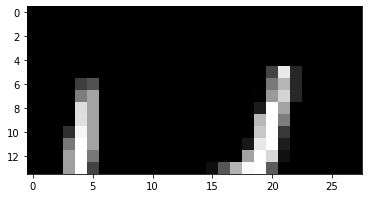

In [100]:
y = input_1[2]

plt.imshow(y)
plt.gray()

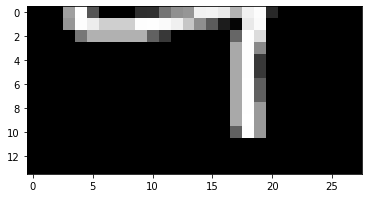

In [101]:
y1 = input_2[2]

plt.imshow(y1)
plt.gray()

In [102]:
def build_model_1(width, height, depth):
	# initialize the input shape and channels dimension to be
	# "channels last" ordering
	inputShape = (width,height, depth)
	chanDim = -1
	# build the model using Keras' Sequential API
	model = Sequential([
		Flatten(input_shape = inputShape),
    Dense(64,activation = 'relu')
		
	])
	# return the built model to the calling function
	return model

In [103]:
def build_model_2(width, height, classes):
	# initialize the input shape and channels dimension to be
	# "channels last" ordering
	inputShape = (width,height)
	chanDim = -1
	# build the model using Keras' Sequential API
	model = Sequential([
		Flatten(input_shape = inputShape),
    Dense(392,activation = 'relu'),
		Dense(classes, activation= "softmax")
	])
	# return the built model to the calling function
	return model

In [104]:
# initialize the number of epochs to train for, batch size, and
# initial learning rate
EPOCHS = 2
BS = 1
INIT_LR = 1e-3

In [105]:
# build our model and initialize our optimizer
print("[INFO] creating model...")
model1= build_model_1(14,28,1)
model2= build_model_1(14,28,1)
model3= build_model_2(128,1,784)
opt = Adam(learning_rate=INIT_LR, decay=INIT_LR / EPOCHS)

[INFO] creating model...


In [106]:
model1.summary()

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_18 (Flatten)        (None, 392)               0         
                                                                 
 dense_24 (Dense)            (None, 64)                25152     
                                                                 
Total params: 25,152
Trainable params: 25,152
Non-trainable params: 0
_________________________________________________________________


In [107]:
model2.summary()

Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_19 (Flatten)        (None, 392)               0         
                                                                 
 dense_25 (Dense)            (None, 64)                25152     
                                                                 
Total params: 25,152
Trainable params: 25,152
Non-trainable params: 0
_________________________________________________________________


In [108]:
model1.summary()

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_18 (Flatten)        (None, 392)               0         
                                                                 
 dense_24 (Dense)            (None, 64)                25152     
                                                                 
Total params: 25,152
Trainable params: 25,152
Non-trainable params: 0
_________________________________________________________________


In [116]:
def step(X1,X2,y):
	# keep track of our gradients
    
    with tf.GradientTape() as tape:
      pred1 = model1(X1)
      pred2 = model2(X2)
      X3 = tf.keras.layers.concatenate([pred1,pred2])
      pred3 = model3(X3)
      loss = binary_crossentropy(y, pred3)
	# calculate the gradients using our tape and then update the
	# model weights
    grads3 = tape.gradient(loss, model3.trainable_variables)
    grads1 = tape.gradient(grads3, model1.trainable_variables)
    grads2 = tape.gradient(grads3, model2.trainable_variables)
    opt.apply_gradients(zip(grads3, model3.trainable_variables))
    opt.apply_gradients(zip(grads1, model1.trainable_variables))
    opt.apply_gradients(zip(grads2, model2.trainable_variables)) 

In [117]:
 #compute the number of batch updates per epoch
numUpdates = int(trainX.shape[0] / BS)
# loop over the number of epochs
for epoch in range(0, EPOCHS):
	# show the current epoch number
	print("[INFO] starting epoch {}/{}...".format(epoch + 1, EPOCHS), end="")
	sys.stdout.flush()
	epochStart = time.time()
	# loop over the data in batch size increments
	for i in range(0, numUpdates):
		# determine starting and ending slice indexes for the current
		# batch
		start = i * BS
		end = start + BS
		# take a step
		step(input_1[start:end],input_2[start:end], trainY[start:end])
	# show timing information for the epoch
	epochEnd = time.time()
	elapsed = (epochEnd - epochStart) / 60.0
	print("took {:.4} minutes".format(elapsed))

[INFO] starting epoch 1/2...

RuntimeError: ignored